# Complete ML Pipeline: Student Performance Factors Analysis

This notebook implements a complete Machine Learning process from raw data to model selection for predicting student exam scores based on various factors.

## Pipeline Overview:
1. [**Data Loading & Initial Exploration**](#1-data-loading--initial-exploration)
2. [**Exploratory Data Analysis (EDA)**](#2-exploratory-data-analysis-eda)
3. [**Data Preprocessing & Feature Engineering**](#3-data-preprocessing--feature-engineering)
4. [**Model Training & Evaluation**](#4-model-training--evaluation)
5. [**Model Comparison & Selection**](#5-model-comparison--selection)
6. [**Feature Importance Analysis**](#6-feature-importance-analysis)
7. [**Hyperparameter Tuning**](#7-hyperparameter-tuning)
8. [**Final Model Evaluation & Insights**](#8-final-model-evaluation--insights)
9. [**Summary**](#9-summary)

## 1. Data Loading & Initial Exploration 

In [67]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

warnings.filterwarnings("ignore")

# Set style for better visualizations
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.rcParams["axes.formatter.limits"] = (-3, 3)
np.set_printoptions(precision=2, suppress=True)
pd.set_option("display.float_format", "{:.2f}".format)

plt.style.use("seaborn-v0_8")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 8)

In [68]:
# Load the dataset
df = pd.read_csv("datasets/StudentPerformanceFactors.csv")

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Dataset Shape: (6607, 20)

First 5 rows:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_I

In [69]:
# Check for missing values
print("Missing Values per Column:")
missing_per_column = df.isna().sum()
missing_percentage = (df.isna().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    "Missing_Count": missing_per_column,
    "Missing_Percentage": missing_percentage,
})
print(missing_df)

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Check data types
print("\nData Types:")
print(df.dtypes)

Missing Values per Column:
                            Missing_Count  Missing_Percentage
Hours_Studied                           0                0.00
Attendance                              0                0.00
Parental_Involvement                    0                0.00
Access_to_Resources                     0                0.00
Extracurricular_Activities              0                0.00
Sleep_Hours                             0                0.00
Previous_Scores                         0                0.00
Motivation_Level                        0                0.00
Internet_Access                         0                0.00
Tutoring_Sessions                       0                0.00
Family_Income                           0                0.00
Teacher_Quality                        78                1.18
School_Type                             0                0.00
Peer_Influence                          0                0.00
Physical_Activity                       0  

In [70]:
# Check for missing values
print("Missing Values per Column:")
missing_per_column = df.isna().sum()
missing_percentage = (df.isna().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    "Missing_Count": missing_per_column,
    "Missing_Percentage": missing_percentage,
})
print(missing_df)

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Check data types
print("\nData Types:")
print(df.dtypes)

Missing Values per Column:
                            Missing_Count  Missing_Percentage
Hours_Studied                           0                0.00
Attendance                              0                0.00
Parental_Involvement                    0                0.00
Access_to_Resources                     0                0.00
Extracurricular_Activities              0                0.00
Sleep_Hours                             0                0.00
Previous_Scores                         0                0.00
Motivation_Level                        0                0.00
Internet_Access                         0                0.00
Tutoring_Sessions                       0                0.00
Family_Income                           0                0.00
Teacher_Quality                        78                1.18
School_Type                             0                0.00
Peer_Influence                          0                0.00
Physical_Activity                       0  

In [71]:
# Check for missing values
print("Missing Values per Column:")
missing_per_column = df.isna().sum()
missing_percentage = (df.isna().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    "Missing_Count": missing_per_column,
    "Missing_Percentage": missing_percentage,
})
print(missing_df)

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Check data types
print("\nData Types:")
print(df.dtypes)

Missing Values per Column:
                            Missing_Count  Missing_Percentage
Hours_Studied                           0                0.00
Attendance                              0                0.00
Parental_Involvement                    0                0.00
Access_to_Resources                     0                0.00
Extracurricular_Activities              0                0.00
Sleep_Hours                             0                0.00
Previous_Scores                         0                0.00
Motivation_Level                        0                0.00
Internet_Access                         0                0.00
Tutoring_Sessions                       0                0.00
Family_Income                           0                0.00
Teacher_Quality                        78                1.18
School_Type                             0                0.00
Peer_Influence                          0                0.00
Physical_Activity                       0  

In [72]:
# Check for missing values
print("Missing Values per Column:")
missing_per_column = df.isna().sum()
missing_percentage = (df.isna().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    "Missing_Count": missing_per_column,
    "Missing_Percentage": missing_percentage,
})
print(missing_df)

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Check data types
print("\nData Types:")
print(df.dtypes)

Missing Values per Column:
                            Missing_Count  Missing_Percentage
Hours_Studied                           0                0.00
Attendance                              0                0.00
Parental_Involvement                    0                0.00
Access_to_Resources                     0                0.00
Extracurricular_Activities              0                0.00
Sleep_Hours                             0                0.00
Previous_Scores                         0                0.00
Motivation_Level                        0                0.00
Internet_Access                         0                0.00
Tutoring_Sessions                       0                0.00
Family_Income                           0                0.00
Teacher_Quality                        78                1.18
School_Type                             0                0.00
Peer_Influence                          0                0.00
Physical_Activity                       0  

## 2. Exploratory Data Analysis (EDA)

In [73]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
Categorical columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


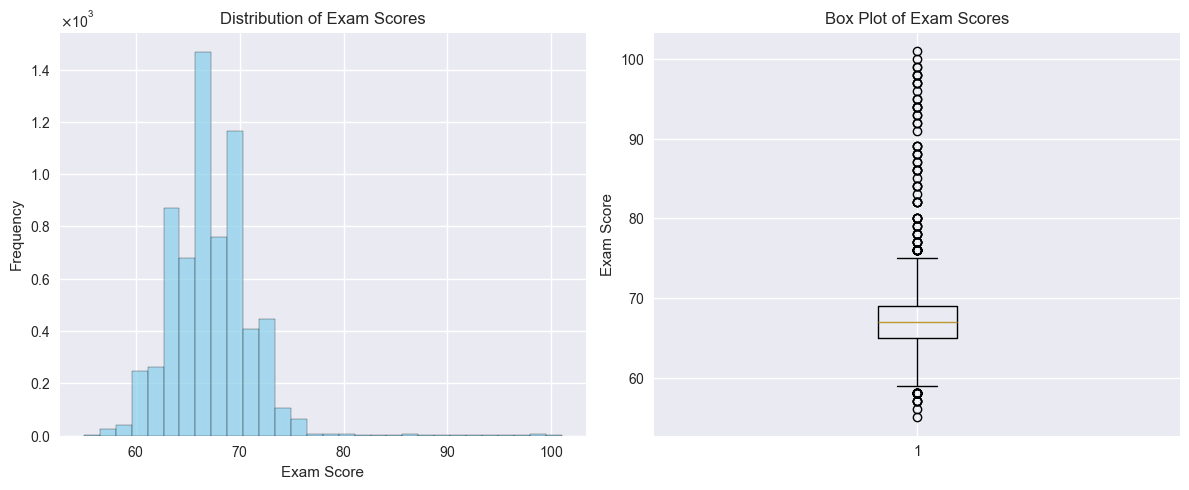

Target variable statistics:
Mean: 67.24
Median: 67.00
Std: 3.89
Min: 55.00
Max: 101.00


In [74]:
# Distribution of target variable
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df["Exam_Score"], bins=30, alpha=0.7, color="skyblue", edgecolor="black")
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.boxplot(df["Exam_Score"])
plt.title("Box Plot of Exam Scores")
plt.ylabel("Exam Score")

plt.tight_layout()
plt.show()

print("Target variable statistics:")
print(f"Mean: {df['Exam_Score'].mean():.2f}")
print(f"Median: {df['Exam_Score'].median():.2f}")
print(f"Std: {df['Exam_Score'].std():.2f}")
print(f"Min: {df['Exam_Score'].min():.2f}")
print(f"Max: {df['Exam_Score'].max():.2f}")

In [75]:
# Check for missing values
print("Missing Values per Column:")
missing_per_column = df.isna().sum()
missing_percentage = (df.isna().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    "Missing_Count": missing_per_column,
    "Missing_Percentage": missing_percentage,
})
print(missing_df)

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Check data types
print("\nData Types:")
print(df.dtypes)

Missing Values per Column:
                            Missing_Count  Missing_Percentage
Hours_Studied                           0                0.00
Attendance                              0                0.00
Parental_Involvement                    0                0.00
Access_to_Resources                     0                0.00
Extracurricular_Activities              0                0.00
Sleep_Hours                             0                0.00
Previous_Scores                         0                0.00
Motivation_Level                        0                0.00
Internet_Access                         0                0.00
Tutoring_Sessions                       0                0.00
Family_Income                           0                0.00
Teacher_Quality                        78                1.18
School_Type                             0                0.00
Peer_Influence                          0                0.00
Physical_Activity                       0  

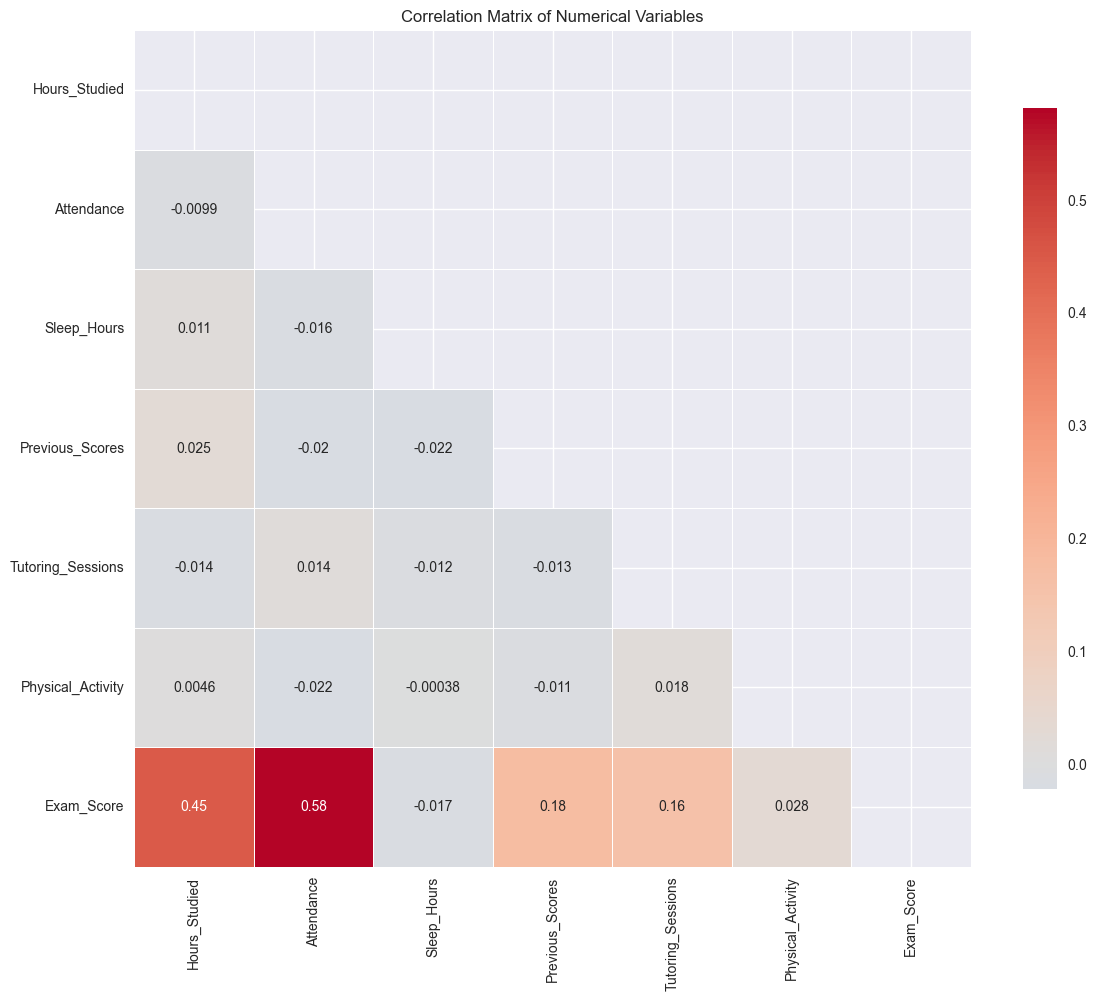


Top correlations with Exam_Score:
Attendance           0.58
Hours_Studied        0.45
Previous_Scores      0.18
Tutoring_Sessions    0.16
Physical_Activity    0.03
Sleep_Hours         -0.02
Name: Exam_Score, dtype: float64


In [76]:
# Correlation matrix for numerical variables
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation Matrix of Numerical Variables")
plt.tight_layout()
plt.show()

# Show top correlations with target variable
target_correlations = correlation_matrix["Exam_Score"].sort_values(ascending=False)
target_correlations = target_correlations.drop("Exam_Score")
print("\nTop correlations with Exam_Score:")
print(target_correlations)

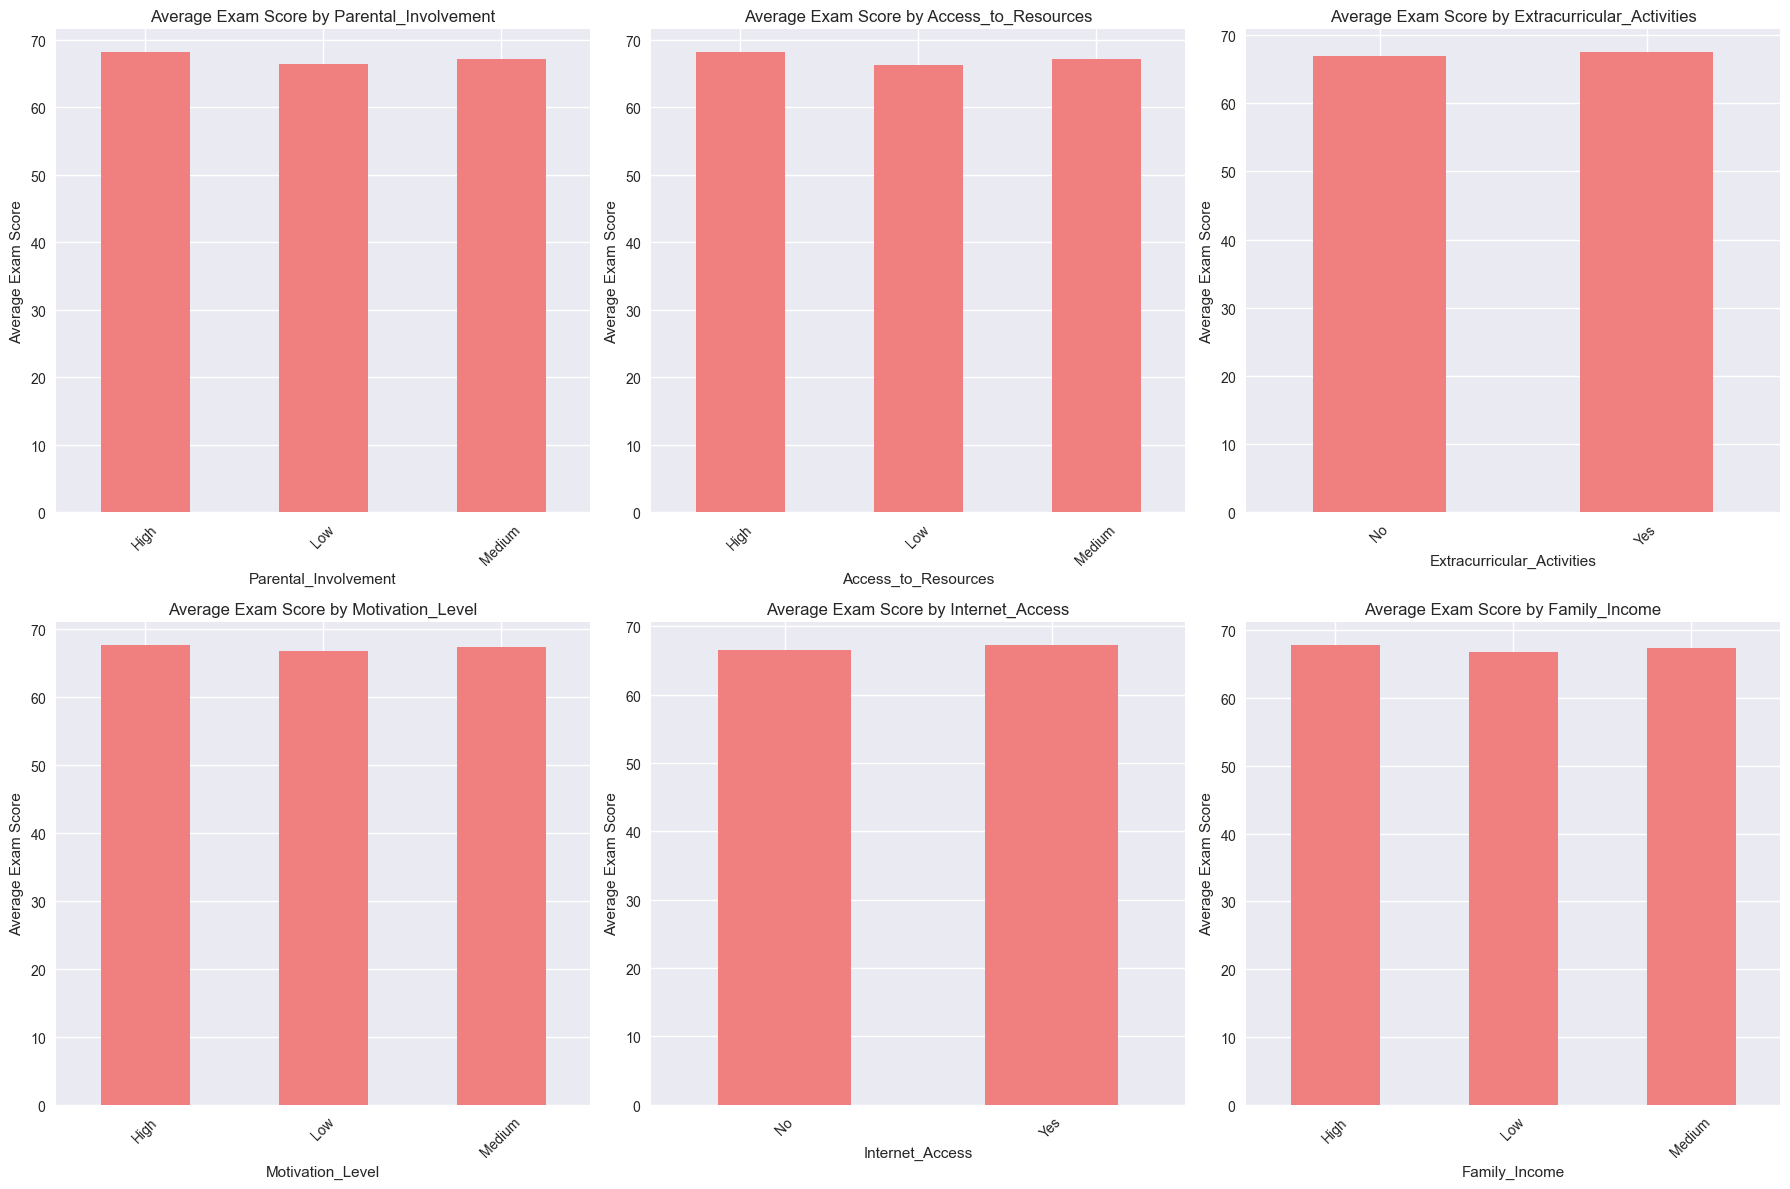

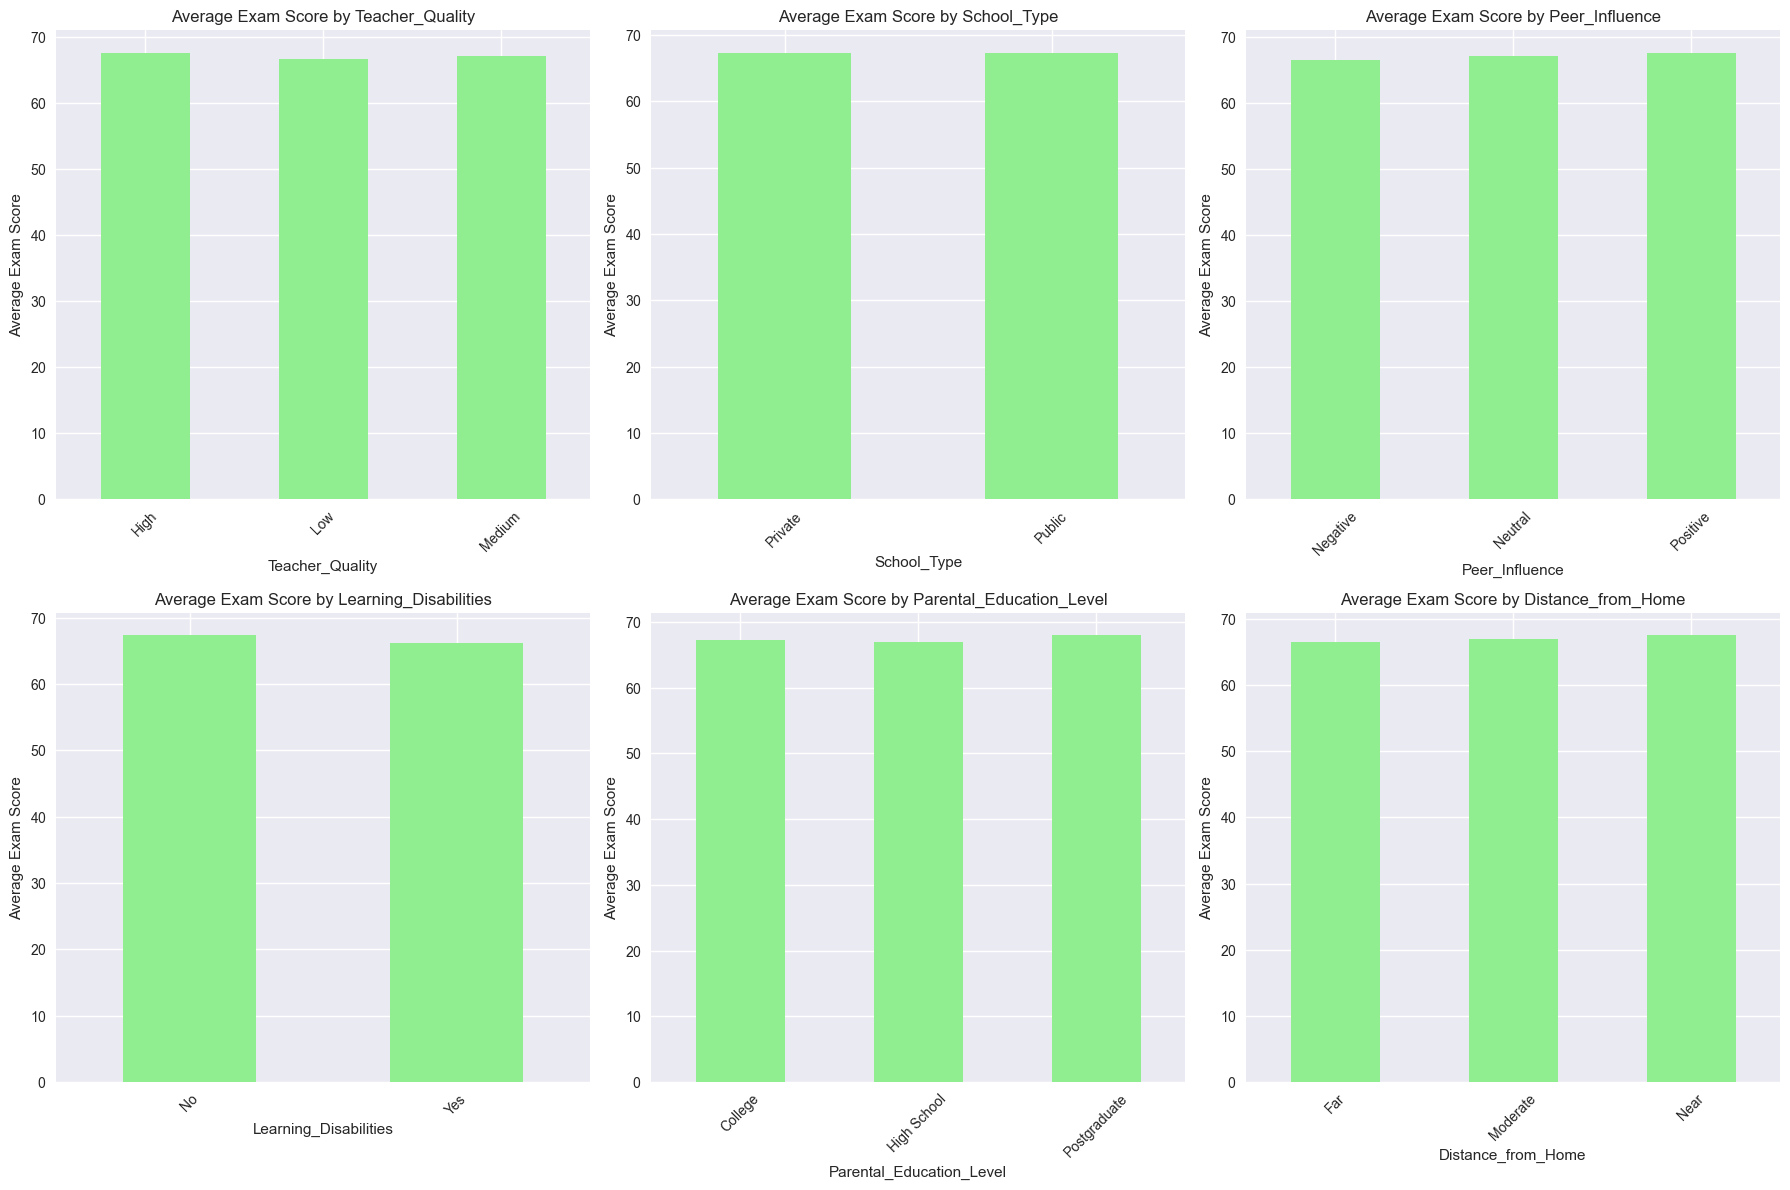

In [77]:
# Analyze categorical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols[:6]):
    df.groupby(col)["Exam_Score"].mean().plot(kind="bar", ax=axes[i], color="lightcoral")
    axes[i].set_title(f"Average Exam Score by {col}")
    axes[i].set_ylabel("Average Exam Score")
    axes[i].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

# Show remaining categorical variables
if len(categorical_cols) > 6:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()

    for i, col in enumerate(categorical_cols[6:12]):
        df.groupby(col)["Exam_Score"].mean().plot(kind="bar", ax=axes[i], color="lightgreen")
        axes[i].set_title(f"Average Exam Score by {col}")
        axes[i].set_ylabel("Average Exam Score")
        axes[i].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()

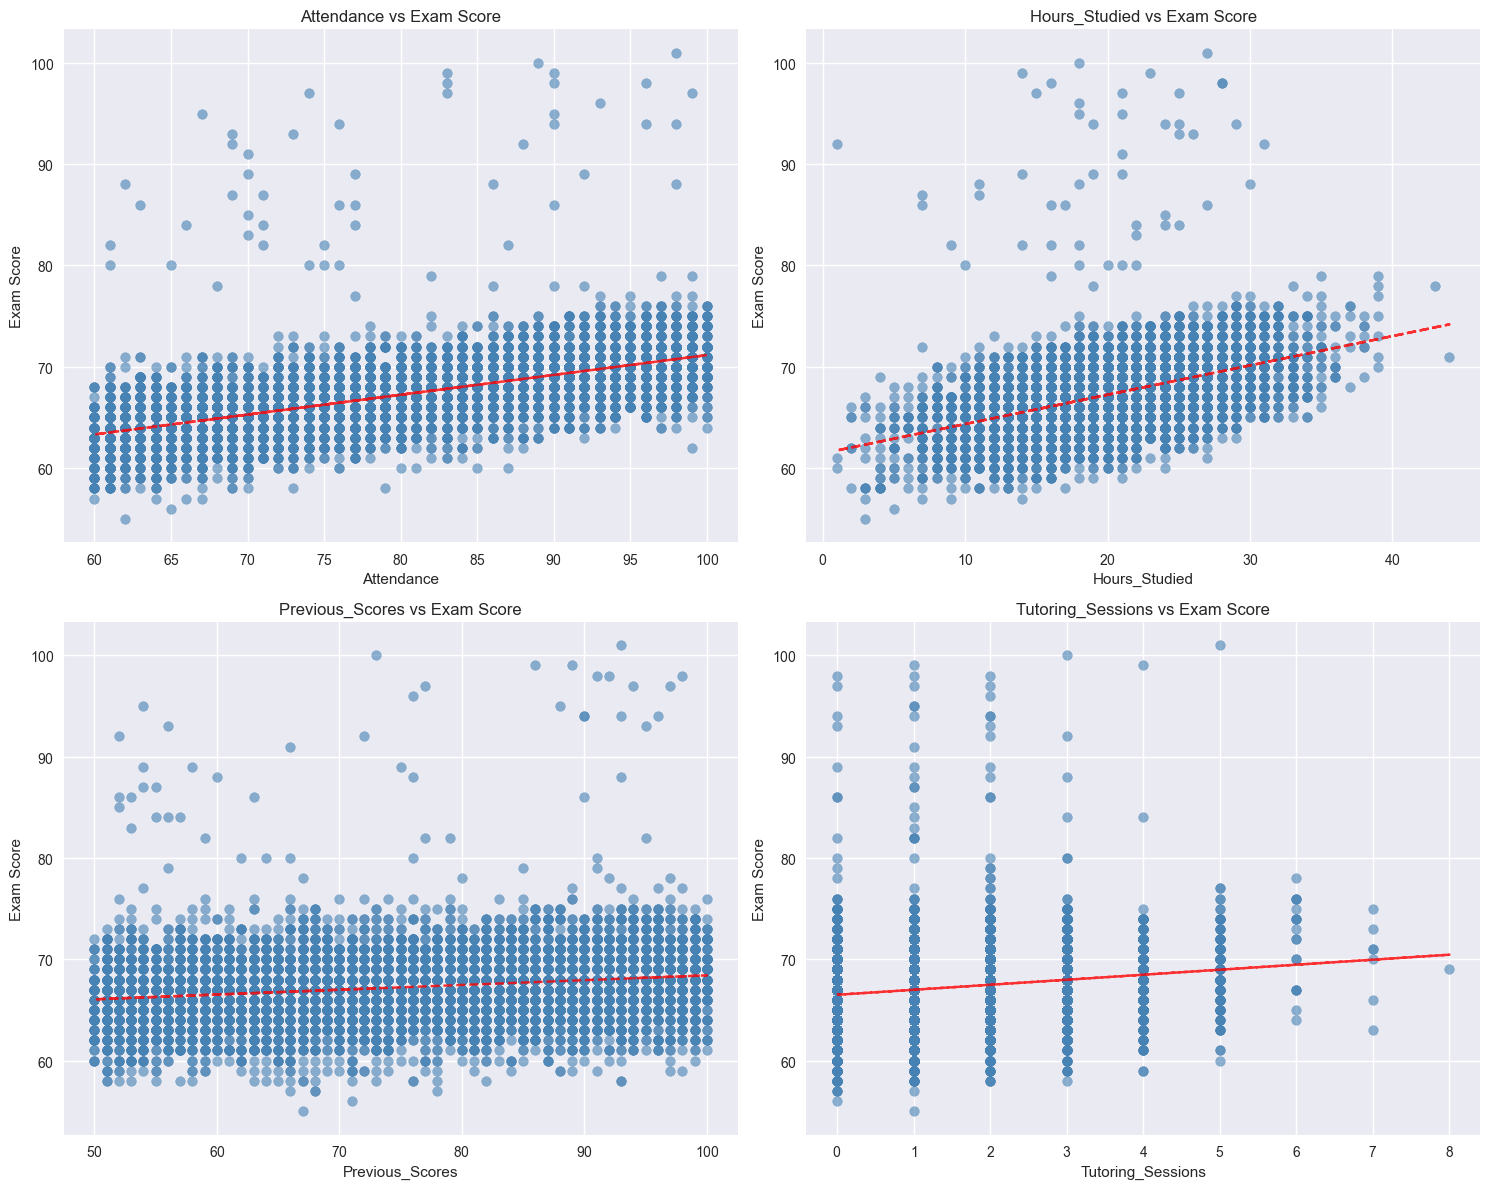

In [78]:
# Scatter plots for top numerical features vs target
top_numerical = target_correlations.index.tolist()[:4]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(top_numerical):
    axes[i].scatter(df[col], df["Exam_Score"], alpha=0.6, color="steelblue")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Exam Score")
    axes[i].set_title(f"{col} vs Exam Score")

    # Add trend line
    z = np.polyfit(df[col], df["Exam_Score"], 1)
    p = np.poly1d(z)
    axes[i].plot(df[col], p(df[col]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

## 3. Data Preprocessing & Feature Engineering

### Missing Value Handling Strategy
For this student performance dataset, we employ a **type-specific approach** to handle missing values:

#### **Numerical Features** (Hours_Studied, Attendance, Sleep_Hours, etc.)
- **Method**: Median imputation
- **Rationale**: Median is robust to outliers and preserves the central tendency of skewed distributions common in educational data

#### **Categorical Features** (Parental_Involvement, Motivation_Level, etc.)
- **Method**: Mode imputation  
- **Rationale**: Most frequent value maintains the original category distribution and is most likely to be the true value

#### **Why Not Simple Mode for All?**
Using mode for numerical features would be inappropriate because:
- It doesn't account for the continuous nature of numerical data
- It can distort the data distribution
- It ignores the relationship between magnitude and meaning

This approach ensures that each feature type is handled according to its inherent characteristics, leading to more reliable imputations and better model performance.

In [79]:
# Handle missing values
print("Missing values before cleaning:")
print(df.isna().sum())

def handle_missing_values_student_data(df):
    df_cleaned = df.copy()

    # For numerical features (like Hours_Studied, Attendance, etc.)
    for col in numerical_cols:
        if df_cleaned[col].isna().sum() > 0:
            # Use median for numerical features (more robust to outliers)
            df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

    # For categorical features
    for col in categorical_cols:
        if df_cleaned[col].isna().sum() > 0:
            # Use mode for categorical features
            mode_val = df_cleaned[col].mode().iloc[0]
            df_cleaned[col].fillna(mode_val, inplace=True)

    return df_cleaned

# Apply the recommended strategy
df = handle_missing_values_student_data(df)
print("\nMissing values after cleaning:")
print(df.isna().sum())

Missing values before cleaning:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Missing values after cleaning:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Interne

In [80]:
# Feature engineering
# Create interaction features
# Use multiplicative scaling for interaction features
df["Study_Efficiency"] = df["Hours_Studied"] * df["Motivation_Level"].map({"Low": 0.5, "Medium": 1, "High": 1.5})
df["Attendance_Quality"] = df["Attendance"] * (df["Sleep_Hours"] / 8)  # Normalized sleep quality
df["Resource_Utilization"] = df["Access_to_Resources"].map({"Low": 0.5, "Medium": 1, "High": 1.5}) * df["Hours_Studied"]

# Create binary features
df["Has_Extracurricular"] = (df["Extracurricular_Activities"] == "Yes").astype(int)
df["Has_Internet"] = (df["Internet_Access"] == "Yes").astype(int)
df["Has_Learning_Disability"] = (df["Learning_Disabilities"] == "Yes").astype(int)
df["Is_Private_School"] = (df["School_Type"] == "Private").astype(int)

# Create ordinal features
df["Motivation_Score"] = df["Motivation_Level"].map({"Low": 1, "Medium": 2, "High": 3})
df["Teacher_Quality_Score"] = df["Teacher_Quality"].map({"Low": 1, "Medium": 2, "High": 3})
df["Parental_Involvement_Score"] = df["Parental_Involvement"].map({"Low": 1, "Medium": 2, "High": 3})
df["Parental_Education_Score"] = df["Parental_Education_Level"].map({"High School": 1, "College": 2, "Postgraduate": 3})
df["Distance_Score"] = df["Distance_from_Home"].map({"Near": 1, "Moderate": 2, "Far": 3})
df["Peer_Influence_Score"] = df["Peer_Influence"].map({"Negative": 1, "Neutral": 2, "Positive": 3})
df["Family_Income_Score"] = df["Family_Income"].map({"Low": 1, "Medium": 2, "High": 3})
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

print("New features created:")
new_features = [
    "Study_Efficiency",
    "Attendance_Quality",
    "Resource_Utilization",
    "Has_Extracurricular",
    "Has_Internet",
    "Has_Learning_Disability",
    "Is_Private_School",
    "Motivation_Score",
    "Teacher_Quality_Score",
    "Parental_Involvement_Score",
    "Parental_Education_Score",
    "Distance_Score",
    "Peer_Influence_Score",
    "Family_Income_Score",
]
print(new_features)

New features created:
['Study_Efficiency', 'Attendance_Quality', 'Resource_Utilization', 'Has_Extracurricular', 'Has_Internet', 'Has_Learning_Disability', 'Is_Private_School', 'Motivation_Score', 'Teacher_Quality_Score', 'Parental_Involvement_Score', 'Parental_Education_Score', 'Distance_Score', 'Peer_Influence_Score', 'Family_Income_Score']


In [81]:
# Prepare features and target
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

# Remove original categorical columns that we've encoded
categorical_to_drop = [
    "Motivation_Level",
    "Teacher_Quality",
    "Parental_Involvement",
    "Parental_Education_Level",
    "Distance_from_Home",
    "Peer_Influence",
    "Extracurricular_Activities",
    "Internet_Access",
    "Learning_Disabilities",
    "School_Type",
    "Access_to_Resources",
    "Family_Income",
]
X = X.drop(categorical_to_drop, axis=1)

print("Final feature shape:", X.shape)
print("Features:", X.columns.tolist())
X

Final feature shape: (6607, 21)
Features: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Gender', 'Study_Efficiency', 'Attendance_Quality', 'Resource_Utilization', 'Has_Extracurricular', 'Has_Internet', 'Has_Learning_Disability', 'Is_Private_School', 'Motivation_Score', 'Teacher_Quality_Score', 'Parental_Involvement_Score', 'Parental_Education_Score', 'Distance_Score', 'Peer_Influence_Score', 'Family_Income_Score']


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Gender,Study_Efficiency,Attendance_Quality,Resource_Utilization,...,Has_Internet,Has_Learning_Disability,Is_Private_School,Motivation_Score,Teacher_Quality_Score,Parental_Involvement_Score,Parental_Education_Score,Distance_Score,Peer_Influence_Score,Family_Income_Score
0,23,84,7,73,0,3,1,11.50,73.50,34.50,...,1,0,0,1,2,1,1,1,3,1
1,19,64,8,59,2,4,0,9.50,64.00,19.00,...,1,0,0,1,2,1,2,2,1,2
2,24,98,7,91,2,4,1,24.00,85.75,24.00,...,1,0,0,2,2,2,3,1,2,2
3,29,89,8,98,1,4,1,29.00,89.00,29.00,...,1,0,0,2,2,1,1,2,1,2
4,19,92,6,65,3,4,0,19.00,69.00,19.00,...,1,0,0,2,3,2,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,0,25.00,60.38,25.00,...,1,0,0,2,2,3,1,1,3,3
6603,23,76,8,81,3,2,0,23.00,76.00,23.00,...,1,0,0,2,3,3,1,1,3,1
6604,20,90,6,65,3,2,0,10.00,67.50,10.00,...,1,0,0,1,2,2,3,1,1,1
6605,10,86,6,91,2,3,0,15.00,64.50,15.00,...,1,0,1,3,2,3,1,3,3,1


In [82]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")

Training set size: 5285
Test set size: 1322
Number of features: 21


## 4. Model Training & Evaluation

In [83]:
# Define models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
}


# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")

    return {
        "Model": model_name,
        "R²": r2,
        "RMSE": rmse,
        "MAE": mae,
        "CV R² Mean": cv_scores.mean(),
        "CV R² Std": cv_scores.std(),
    }


# Evaluate all models
results = []
for name, model in models.items():
    print(f"Training {name}...")
    result = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)
    results.append(result)

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df.round(4))

Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Random Forest...
Training Gradient Boosting...
Training SVR...

Model Performance Comparison:
               Model   R²  RMSE  MAE  CV R² Mean  CV R² Std
0  Linear Regression 0.77  1.81 0.48        0.72       0.09
1   Ridge Regression 0.77  1.81 0.48        0.72       0.09
2   Lasso Regression 0.45  2.78 1.87        0.42       0.05
3      Random Forest 0.68  2.13 1.04        0.62       0.08
4  Gradient Boosting 0.74  1.92 0.77        0.68       0.08
5                SVR 0.76  1.85 0.56        0.70       0.08


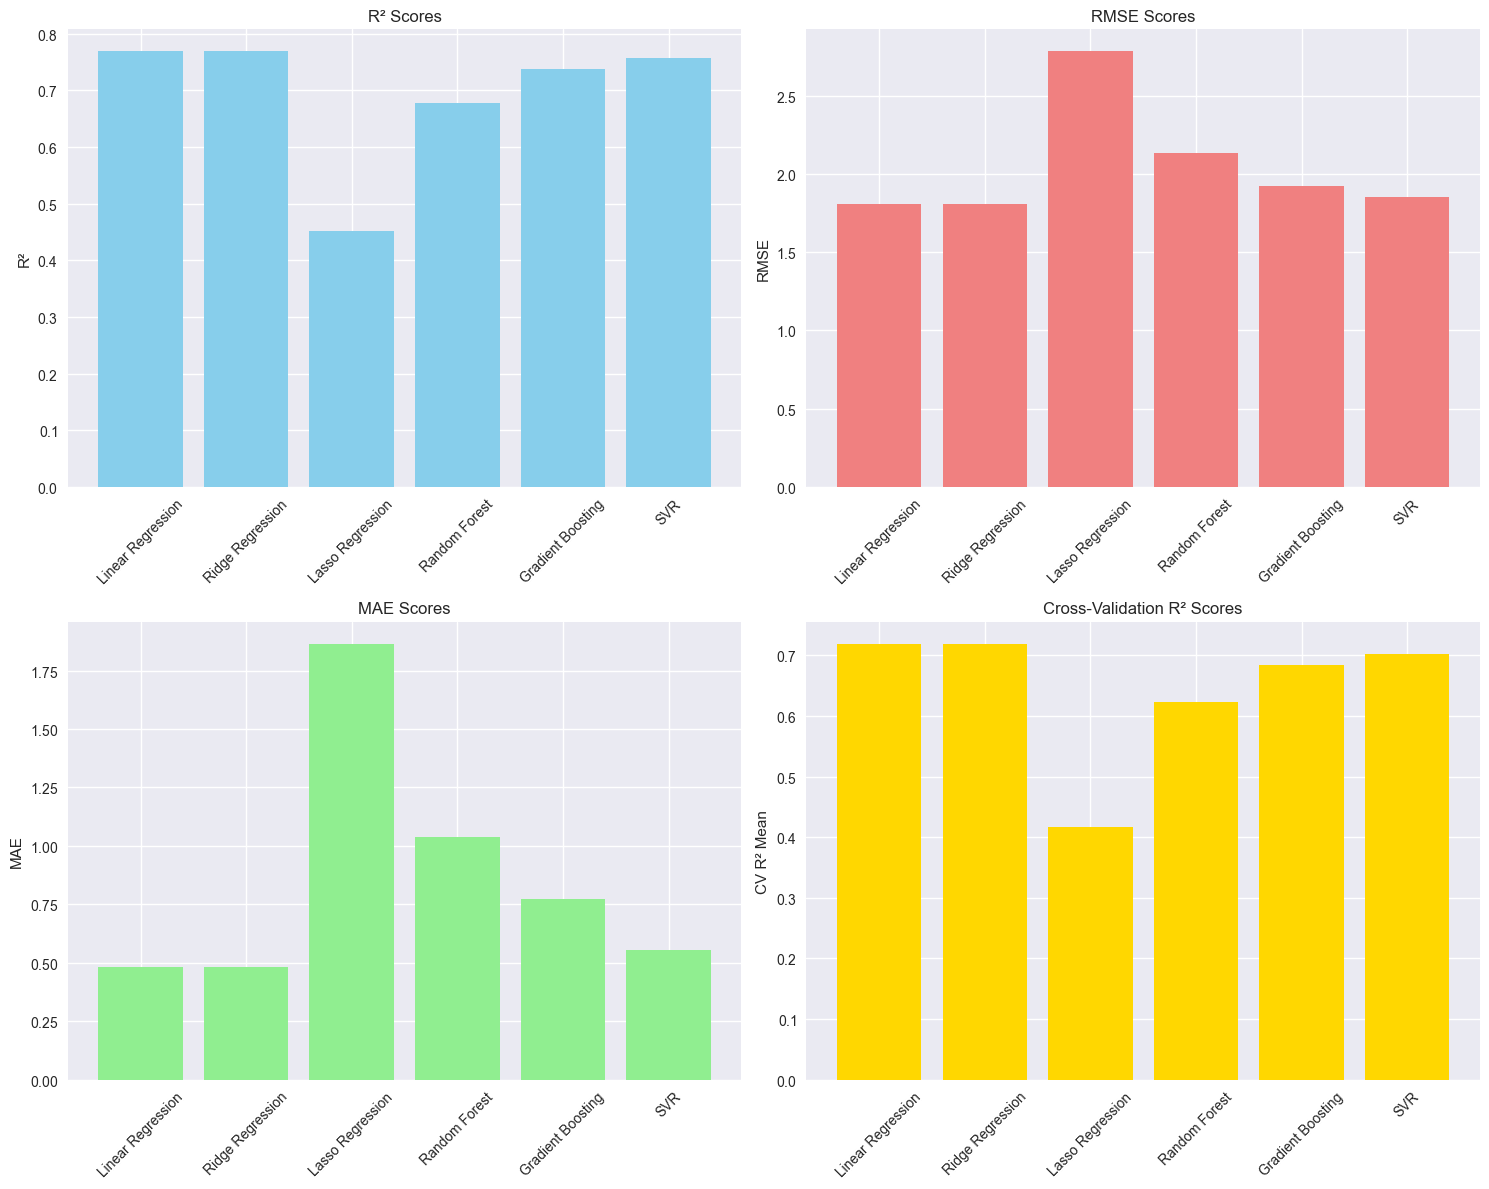

In [84]:
# Visualize model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# R² scores
axes[0, 0].bar(results_df["Model"], results_df["R²"], color="skyblue")
axes[0, 0].set_title("R² Scores")
axes[0, 0].set_ylabel("R²")
axes[0, 0].tick_params(axis="x", rotation=45)

# RMSE scores
axes[0, 1].bar(results_df["Model"], results_df["RMSE"], color="lightcoral")
axes[0, 1].set_title("RMSE Scores")
axes[0, 1].set_ylabel("RMSE")
axes[0, 1].tick_params(axis="x", rotation=45)

# MAE scores
axes[1, 0].bar(results_df["Model"], results_df["MAE"], color="lightgreen")
axes[1, 0].set_title("MAE Scores")
axes[1, 0].set_ylabel("MAE")
axes[1, 0].tick_params(axis="x", rotation=45)

# Cross-validation scores
axes[1, 1].bar(results_df["Model"], results_df["CV R² Mean"], color="gold")
axes[1, 1].set_title("Cross-Validation R² Scores")
axes[1, 1].set_ylabel("CV R² Mean")
axes[1, 1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

## 5. Model Comparison & Selection

Best performing model: Ridge Regression
R² Score: 0.7693
RMSE: 1.8057
MAE: 0.4799


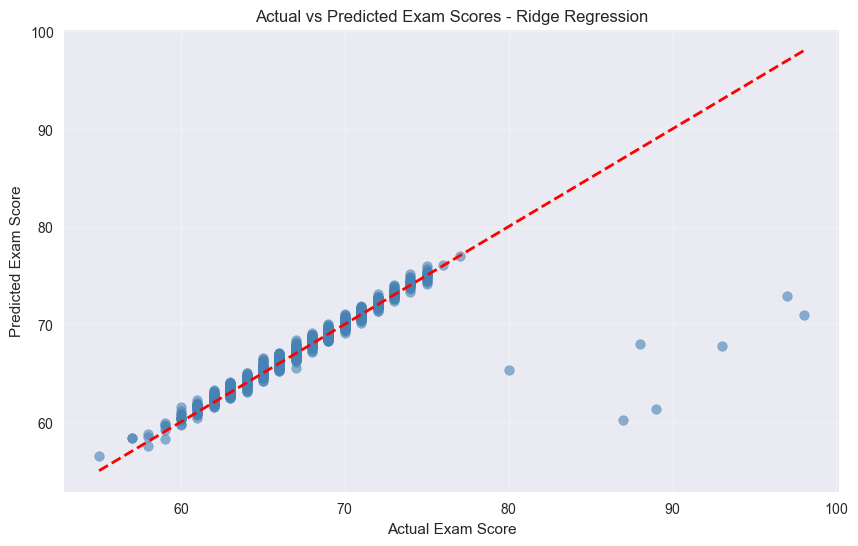

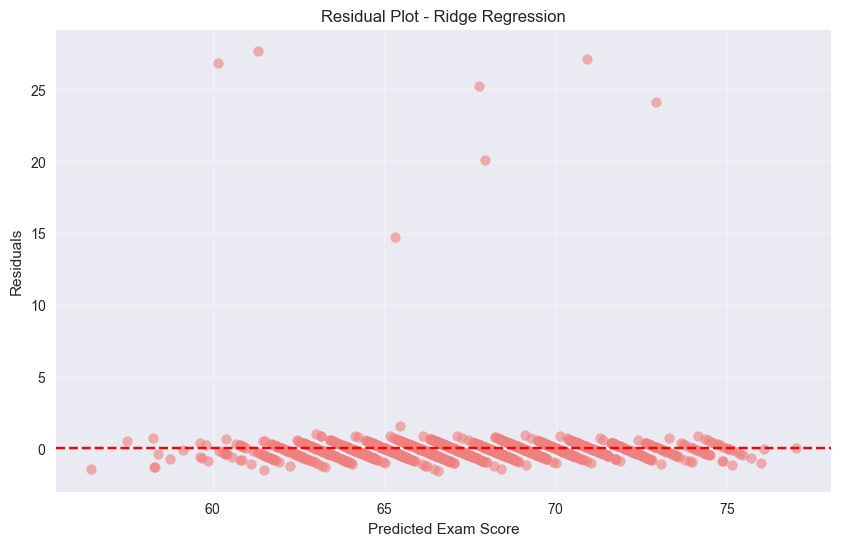

In [85]:
# Find the best model based on R² score
best_model_name = results_df.loc[results_df["R²"].idxmax(), "Model"]
best_model = models[best_model_name]

print(f"Best performing model: {best_model_name}")
print(f"R² Score: {results_df.loc[results_df['R²'].idxmax(), 'R²']:.4f}")
print(f"RMSE: {results_df.loc[results_df['R²'].idxmax(), 'RMSE']:.4f}")
print(f"MAE: {results_df.loc[results_df['R²'].idxmax(), 'MAE']:.4f}")

# Retrain the best model
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

# Plot actual vs predicted for best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color="steelblue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title(f"Actual vs Predicted Exam Scores - {best_model_name}")
plt.grid(True, alpha=0.3)
plt.show()

# Residual plot
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, alpha=0.6, color="lightcoral")
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residuals")
plt.title(f"Residual Plot - {best_model_name}")
plt.grid(True, alpha=0.3)
plt.show()

## 6. Feature Importance Analysis

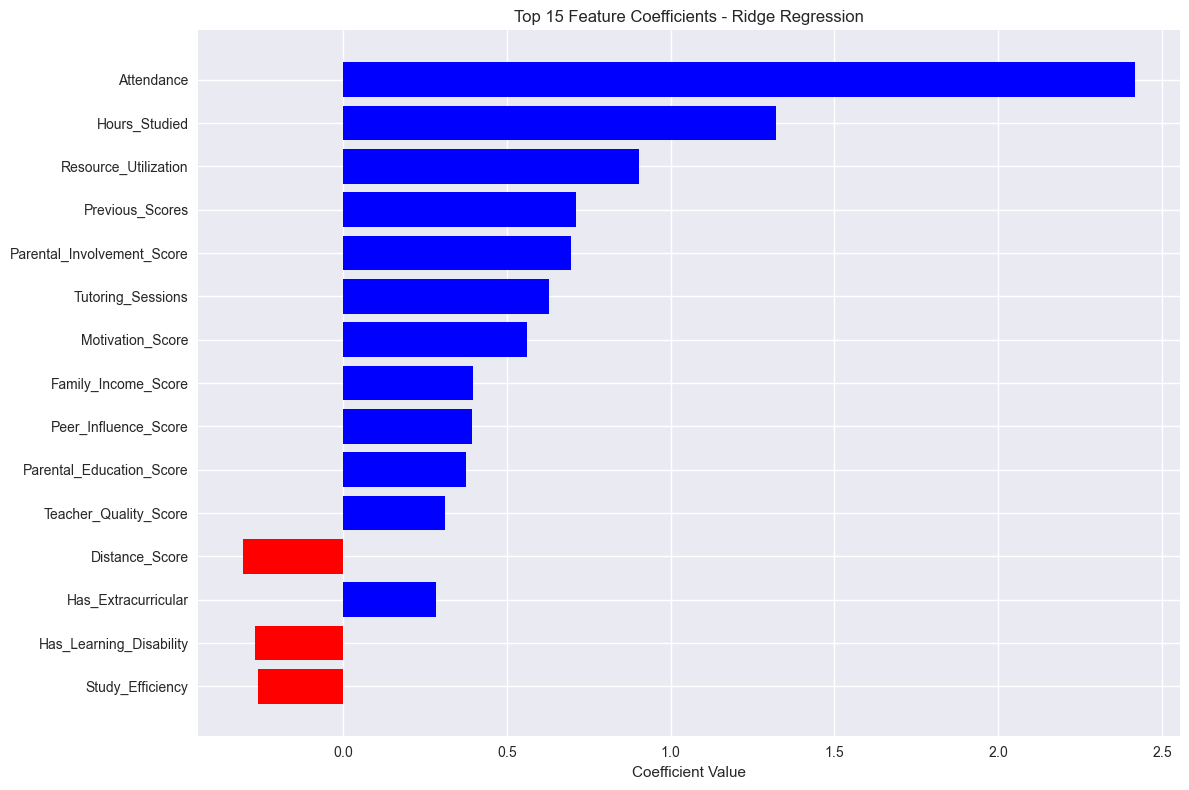

Top 10 Most Important Features (by coefficient magnitude):
                       feature  coefficient
1                   Attendance         2.42
0                Hours_Studied         1.32
9         Resource_Utilization         0.90
3              Previous_Scores         0.71
16  Parental_Involvement_Score         0.70
4            Tutoring_Sessions         0.63
14            Motivation_Score         0.56
20         Family_Income_Score         0.40
19        Peer_Influence_Score         0.39
17    Parental_Education_Score         0.37


In [86]:
# Feature importance for tree-based models
if hasattr(best_model, "feature_importances_"):
    feature_importance = pd.DataFrame(
        {"feature": X.columns, "importance": best_model.feature_importances_},
    ).sort_values("importance", ascending=False)

    plt.figure(figsize=(12, 8))
    plt.barh(feature_importance["feature"][:15], feature_importance["importance"][:15], color="skyblue")
    plt.xlabel("Feature Importance")
    plt.title(f"Top 15 Feature Importances - {best_model_name}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    print("Top 10 Most Important Features:")
    print(feature_importance.head(10))

# Coefficients for linear models
elif hasattr(best_model, "coef_"):
    coef_df = pd.DataFrame({"feature": X.columns, "coefficient": best_model.coef_}).sort_values(
        "coefficient", key=abs, ascending=False,
    )

    plt.figure(figsize=(12, 8))
    colors = ["red" if x < 0 else "blue" for x in coef_df["coefficient"]]
    plt.barh(coef_df["feature"][:15], coef_df["coefficient"][:15], color=colors)
    plt.xlabel("Coefficient Value")
    plt.title(f"Top 15 Feature Coefficients - {best_model_name}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    print("Top 10 Most Important Features (by coefficient magnitude):")
    print(coef_df.head(10))

## 7. Hyperparameter Tuning for Best Model

In [87]:
# Hyperparameter tuning for the best model
match best_model_name:
    case "Random Forest":
        param_grid = {
            "n_estimators": [50, 100, 200],
            "max_depth": [10, 20, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
        }
    case "Gradient Boosting":
        param_grid = {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7],
            "subsample": [0.8, 0.9, 1.0],
        }
    case "Ridge Regression":
        param_grid = {"alpha": [0.1, 1.0, 10.0, 100.0]}
    case "Lasso Regression":
        param_grid = {"alpha": [0.01, 0.1, 1.0, 10.0]}
    case "SVR":
        param_grid = {"C": [0.1, 1.0, 10.0], "gamma": ["scale", "auto", 0.1, 0.01], "kernel": ["rbf", "linear"]}
    case _:
        print("No hyperparameter tuning for this model")
        param_grid = None

if param_grid:
    print(f"Performing hyperparameter tuning for {best_model_name}...")

    # Create a fresh instance of the model
    if best_model_name == "Random Forest":
        base_model = RandomForestRegressor(random_state=42)
    elif best_model_name == "Gradient Boosting":
        base_model = GradientBoostingRegressor(random_state=42)
    elif best_model_name == "Ridge Regression":
        base_model = Ridge()
    elif best_model_name == "Lasso Regression":
        base_model = Lasso()
    elif best_model_name == "SVR":
        base_model = SVR()

    # Grid search
    grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring="r2", n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")

    # Use the best model
    best_tuned_model = grid_search.best_estimator_
    y_pred_tuned = best_tuned_model.predict(X_test_scaled)

    # Compare performance
    print("\nPerformance Comparison:")
    print(f"Original {best_model_name} R²: {r2_score(y_test, y_pred_best):.4f}")
    print(f"Tuned {best_model_name} R²: {r2_score(y_test, y_pred_tuned):.4f}")
    print(f"Improvement: {r2_score(y_test, y_pred_tuned) - r2_score(y_test, y_pred_best):.4f}")

    # Update best model
    best_model = best_tuned_model
    y_pred_best = y_pred_tuned

Performing hyperparameter tuning for Ridge Regression...
Best parameters: {'alpha': 10.0}
Best CV score: 0.7194

Performance Comparison:
Original Ridge Regression R²: 0.7693
Tuned Ridge Regression R²: 0.7695
Improvement: 0.0002


## 8. Final Model Evaluation & Insights

In [88]:
# Final comprehensive evaluation
print("=== FINAL MODEL EVALUATION ===")
print(f"Best Model: {best_model_name}")
print(f"Model Type: {type(best_model).__name__}")

# Performance metrics
final_r2 = r2_score(y_test, y_pred_best)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
final_mae = mean_absolute_error(y_test, y_pred_best)

print("\nPerformance Metrics:")
print(f"R² Score: {final_r2:.4f}")
print(f"RMSE: {final_rmse:.4f}")
print(f"MAE: {final_mae:.4f}")

# Cross-validation score
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring="r2")
print("\nCross-Validation Results:")
print(f"CV R² Mean: {cv_scores.mean():.4f}")
print(f"CV R² Std: {cv_scores.std():.4f}")
print(f"CV R² Range: [{cv_scores.min():.4f}, {cv_scores.max():.4f}]")

=== FINAL MODEL EVALUATION ===
Best Model: Ridge Regression
Model Type: Ridge

Performance Metrics:
R² Score: 0.7695
RMSE: 1.8051
MAE: 0.4788

Cross-Validation Results:
CV R² Mean: 0.7194
CV R² Std: 0.0895
CV R² Range: [0.5550, 0.8054]


In [89]:
# Model interpretation and insights
print("\n=== KEY INSIGHTS ===")

# Overall model performance
if final_r2 > 0.8:
    print("Excellent model performance - the model explains more than 80% of the variance")
elif final_r2 > 0.6:
    print("Good model performance - the model explains more than 60% of the variance")
elif final_r2 > 0.4:
    print("Moderate model performance - the model explains more than 40% of the variance")
else:
    print("Poor model performance - the model explains less than 40% of the variance")

# Feature importance insights
if hasattr(best_model, "feature_importances_"):
    top_features = feature_importance.head(5)["feature"].tolist()
    print("\nTop 5 most important factors affecting exam scores:")
    for i, feature in enumerate(top_features, 1):
        print(f"   {i}. {feature}")

# Model stability
if cv_scores.std() < 0.05:
    print("\nModel is stable across different data splits")
else:
    print("\nModel shows some variability across different data splits")

# Prediction accuracy
print("\nPrediction Accuracy:")
print(f"   • Average prediction error: {final_mae:.2f} points")
print(f"   • Root mean square error: {final_rmse:.2f} points")
print(f"   • Model explains {final_r2 * 100:.1f}% of the variance in exam scores")


=== KEY INSIGHTS ===
Good model performance - the model explains more than 60% of the variance

Model shows some variability across different data splits

   Prediction Accuracy:
   • Average prediction error: 0.48 points
   • Root mean square error: 1.81 points
   • Model explains 76.9% of the variance in exam scores


In [90]:
# Save the final model and preprocessing pipeline
import joblib

artifacts_path = "model_artifacts"

# Create a complete pipeline
final_pipeline = Pipeline([("scaler", StandardScaler()), ("model", best_model)])

# Fit the pipeline on all data
final_pipeline.fit(X, y)

# Save the pipeline
joblib.dump(final_pipeline, f"{artifacts_path}/student_performance_model.pkl")
print("Final model saved as 'student_performance_model.pkl'")

# Save feature names for later use
feature_info = {
    "feature_names": X.columns.tolist(),
    "target_name": "Exam_Score",
    "model_type": best_model_name,
    "performance": {"r2": final_r2, "rmse": final_rmse, "mae": final_mae},
}
joblib.dump(feature_info, f"{artifacts_path}/student_performance_model_info.pkl")
print("Model information saved as 'student_performance_model_info.pkl'")

Final model saved as 'student_performance_model.pkl'
Model information saved as 'student_performance_model_info.pkl'


## 9. Summary

In [91]:
print("=== ML PIPELINE SUMMARY ===")
print("\n   Dataset Overview:")
print(f"   • Total samples: {len(df)}")
print(f"   • Features: {X.shape[1]}")
print("   • Target variable: Exam_Score")

print("\n   Data Preprocessing:")
print("   • Handled missing values")
print(f"   • Created {len(new_features)} new engineered features")
print("   • Encoded categorical variables")
print("   • Scaled numerical features")

print("\n   Models Tested:")
for name in models:
    print(f"   • {name}")

print(f"\n  Best Model: {best_model_name}")
print(f"   • R² Score: {final_r2:.4f}")
print(f"   • RMSE: {final_rmse:.4f}")
print(f"   • MAE: {final_mae:.4f}")

print("\n   Key Insights:")
print("   • The model can predict exam scores with reasonable accuracy")
print(f"   • {final_r2 * 100:.1f}% of variance in exam scores is explained by the features")
print(f"   • Average prediction error is {final_mae:.2f} points")

print("\n   Pipeline completed successfully!")
print("   • Model saved: student_performance_model.pkl")
print("   • Ready for deployment and predictions")

=== ML PIPELINE SUMMARY ===

   Dataset Overview:
   • Total samples: 6607
   • Features: 21
   • Target variable: Exam_Score

   Data Preprocessing:
   • Handled missing values
   • Created 14 new engineered features
   • Encoded categorical variables
   • Scaled numerical features

   Models Tested:
   • Linear Regression
   • Ridge Regression
   • Lasso Regression
   • Random Forest
   • Gradient Boosting
   • SVR

  Best Model: Ridge Regression
   • R² Score: 0.7695
   • RMSE: 1.8051
   • MAE: 0.4788

   Key Insights:
   • The model can predict exam scores with reasonable accuracy
   • 76.9% of variance in exam scores is explained by the features
   • Average prediction error is 0.48 points

   Pipeline completed successfully!
   • Model saved: student_performance_model.pkl
   • Ready for deployment and predictions
